# 线性回归

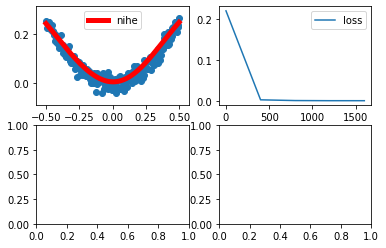

In [21]:
import tensorflow  as tf
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

#随机生成200个点
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise=np.random.normal(0,0.02,x_data.shape)
y_data=np.square(x_data)+noise
#定义两个placeholder
x=tf.compat.v1.placeholder(tf.float32,[None,1]) #不确定行，但是一列
y=tf.compat.v1.placeholder(tf.float32,[None,1]) #不确定行，但是一列

'''构建神经网络的中间层'''
#10个神经元
w1=tf.Variable(tf.random.normal([1,10])) #是个权值
b1=tf.Variable(tf.zeros([1,10]))  #是个b
y1=tf.matmul(x,w1)+b1 
#激活函数
l1=tf.nn.tanh(y1)
'''神经元的输出层'''
w2=tf.Variable(tf.random.normal([10,1])) #是个权值
b2=tf.Variable(tf.zeros([1,1]))  #是个b
y2=tf.matmul(l1,w2)+b2
#激活函数
prediction=tf.nn.tanh(y2)
'''二次函数'''
loss=tf.reduce_mean(tf.square(y-prediction))
'''梯度下降'''
train_step=tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.6).minimize(loss)
'''创建会话'''
init=tf.compat.v1.global_variables_initializer()
#创建会话
with tf.compat.v1.Session() as sess:
    sess.run(init)
    lo_ss=[]
    j=[]
    for i in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        if (i%400==0):
            j.append(i)
            lo_ss.append(sess.run(loss,feed_dict={x:x_data,y:y_data}))
    #获得预测值
    pre=sess.run(prediction,feed_dict={x:x_data})
'''可视化'''
fig,ax=plt.subplots(2,2)
ax[0][0].scatter(x_data,y_data)
ax[0][0].plot(x_data,pre,label="nihe",color="r",lw=5)
ax[0][1].plot(j,lo_ss,label="loss")
ax[0][0].legend()
ax[0][1].legend()